(Open in colab)

In [19]:
import csv
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass 
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TSLA(Full).csv to TSLA(Full).csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['TSLA(Full).csv']))

print(df2)

            Date    Open    High     Low   Close  Adj_Close    Volume 
0     09/01/2018   22.34   22.59   21.83   22.25      22.25  107199000
1     10/01/2018   22.15   22.47   22.00   22.32      22.32   64648500
2     11/01/2018   22.35   22.99   22.22   22.53      22.53   99682500
3     12/01/2018   22.58   22.69   22.24   22.41      22.41   72376500
4     16/01/2018   22.50   23.00   22.32   22.67      22.67   97114500
...          ...     ...     ...     ...     ...        ...        ...
1253  30/12/2022  119.95  124.48  119.75  123.18     123.18  157304500
1254  03/01/2023  118.47  118.80  104.64  108.10     108.10  231402800
1255  04/01/2023  109.11  114.59  107.52  113.64     113.64  180389000
1256  05/01/2023  110.51  111.75  107.16  110.34     110.34  157986300
1257  06/01/2023  103.00  114.39  101.81  113.06     113.06  220575900

[1258 rows x 7 columns]


In [25]:
df3 = df2[['Date','Open', 'Close', 'Volume ']]
print(df3)

NameError: ignored

Text(0.5, 1.0, 'Volume Graph')

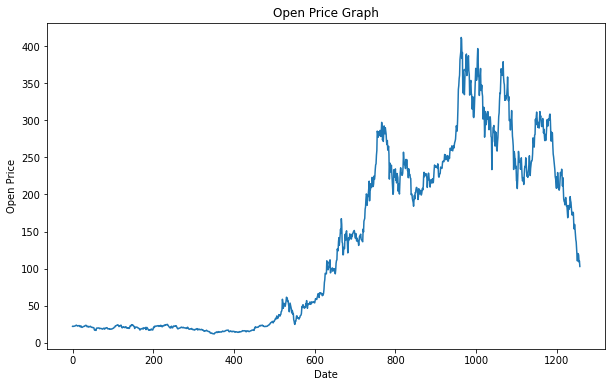

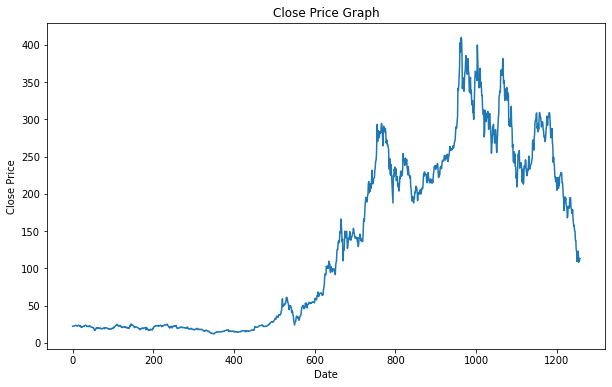

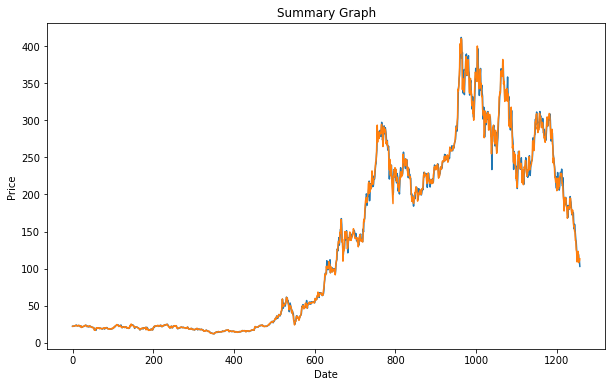

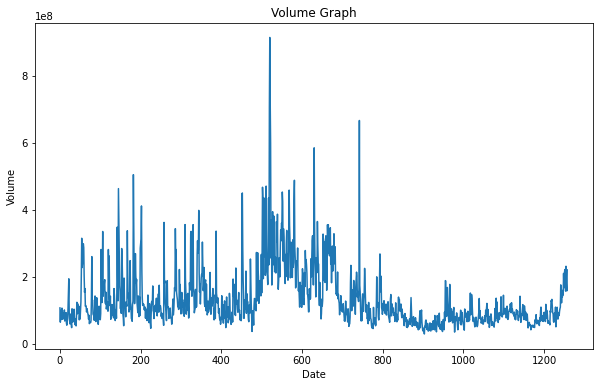

In [18]:
plt.figure(figsize = (10,6))
plt.plot(df3['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Graph')
plt.figure(figsize = (10,6))
plt.plot(df3['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Graph')
plt.figure(figsize = (10,6))
plt.plot(df3['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df3['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Summary Graph')
plt.figure(figsize = (10,6))
plt.plot(df3['Volume '])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Graph')

## Data Pre-processing 



In [20]:
ms = MinMaxScaler()
df3[df3.columns] = ms.fit_transform(df3)

ValueError: ignored